<b>Dataset:</b> https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset?resource=download-directory<br><br>
Train: 13386 images<br>
Val: 3347 images<br><br>


# 1. Image Loading

In [1]:
import sys
import os
import matplotlib.pyplot as plt

In [2]:
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
import image_loader

In [4]:
dataset_path = "../data/"
images = image_loader.load_images_from_dir(dataset_path)

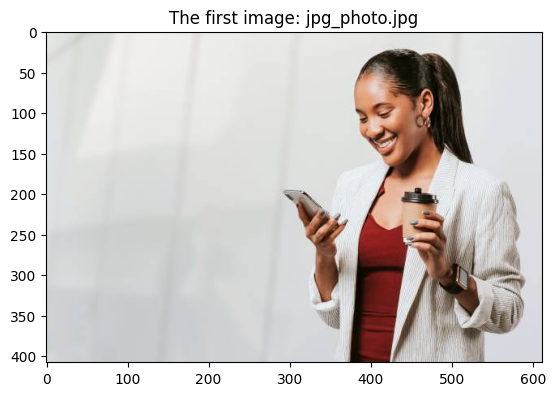

In [5]:
if images:
    filename, img = images[0]
    image_loader.show_image(img, f"The first image: {filename}")
else:
    print(f"Error: There are no images in the folder.")

# 2. Analysis

In [6]:
import image_analysis

In [7]:
for elem in images:

    filename, img = elem
    info = image_analysis.get_image_info(img, dataset_path + filename)

    for el in info:
        print(f"{el}: {info[el]}")
    print("\n")

File: jpg_photo.jpg
Format: JPEG
Size (px): (612, 408)
Channels: 3
Color Mode: RGB
File Size (bytes): 21052
Extension: .jpg


File: holiday.jpeg
Format: JPEG
Size (px): (259, 194)
Channels: 3
Color Mode: RGB
File Size (bytes): 39690
Extension: .jpeg


File: png_image.png
Format: PNG
Size (px): (512, 512)
Channels: 3
Color Mode: L
File Size (bytes): 167034
Extension: .png


File: brain.png
Format: PNG
Size (px): (615, 615)
Channels: 3
Color Mode: RGBA
File Size (bytes): 411692
Extension: .png


File: bmp_photo.bmp
Format: BMP
Size (px): (2612, 3445)
Channels: 3
Color Mode: 1
File Size (bytes): 1130022
Extension: .bmp




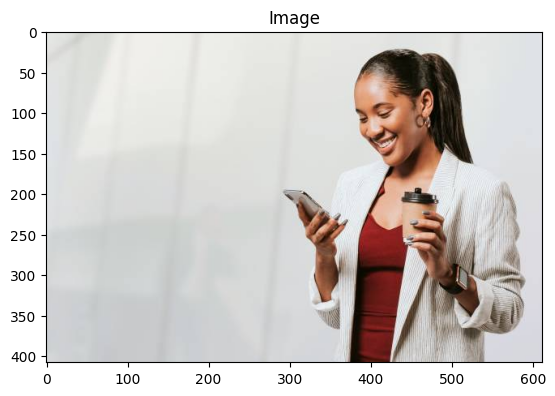

In [8]:
jpg_img = image_loader.load_image("../data/jpg_photo.jpg")
image_loader.show_image(jpg_img)

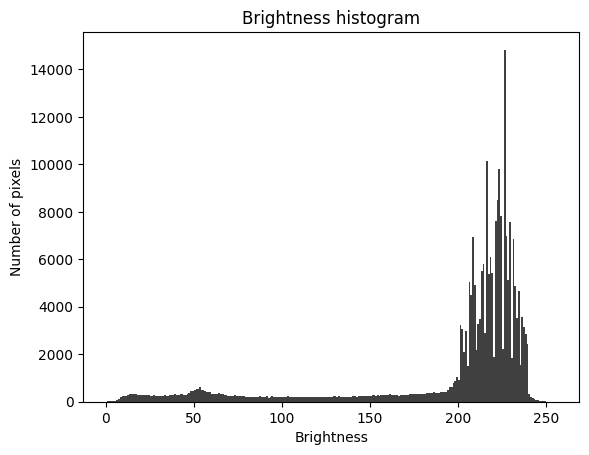

In [9]:
image_analysis.plot_histogram(jpg_img)

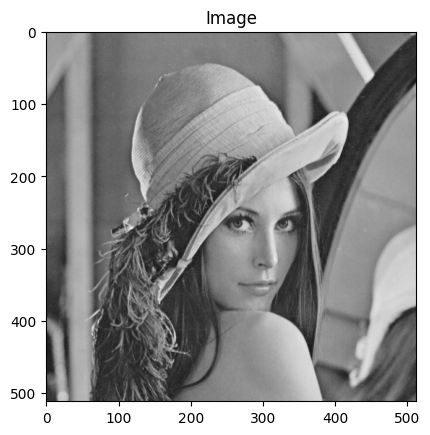

In [10]:
png_img = image_loader.load_image("../data/png_image.png")
image_loader.show_image(png_img)

In [11]:
hist_eq_img = image_analysis.enhance_contrast_hist_equalization(png_img)
clahe_img = image_analysis.enhance_contrast_clahe(png_img)
gamma_img = image_analysis.enhance_contrast_gamma(png_img, gamma=1.2)

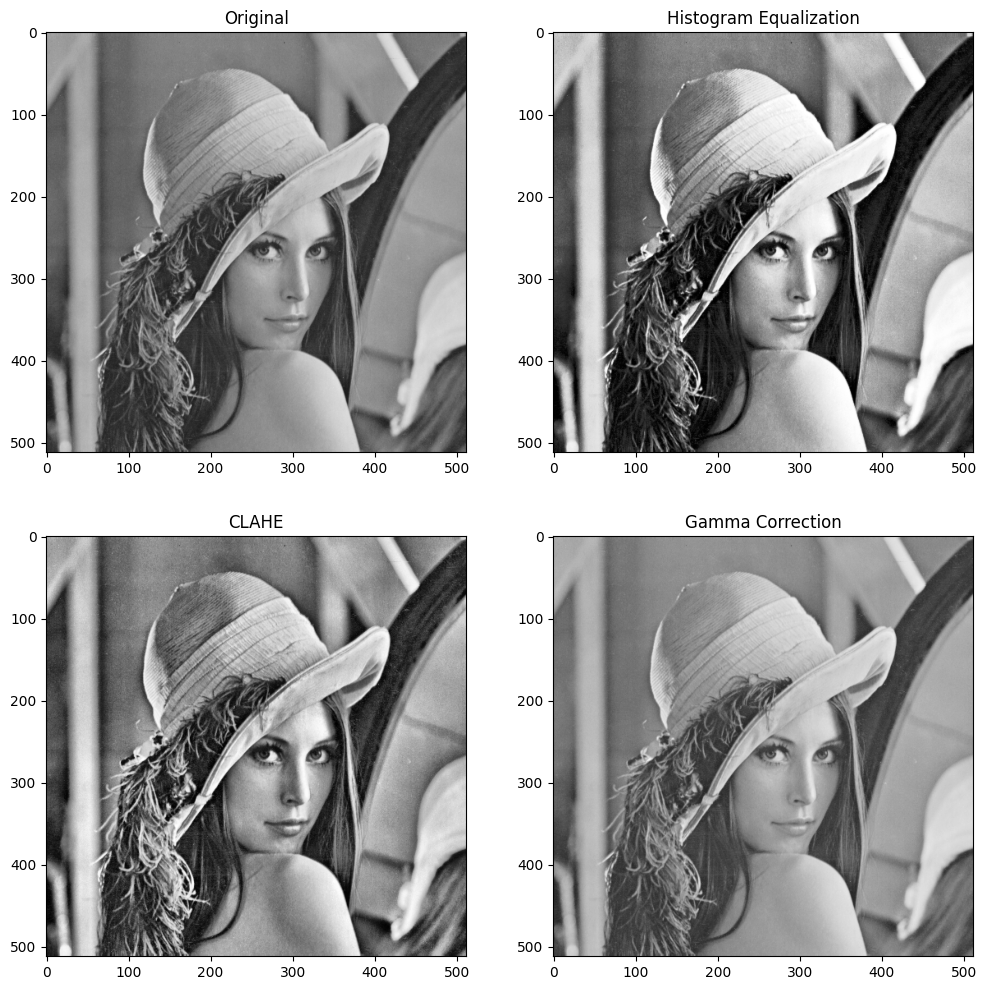

In [12]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(png_img)
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(hist_eq_img, cmap='gray')
plt.title("Histogram Equalization")

plt.subplot(2, 2, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE")

plt.subplot(2, 2, 4)
plt.imshow(gamma_img, cmap='gray')
plt.title("Gamma Correction")

plt.show()


# 3. Applying Filters and Sharpening

## Filters

In [13]:
from image_filters import gaussian_filter, median_filter, bilateral_filter

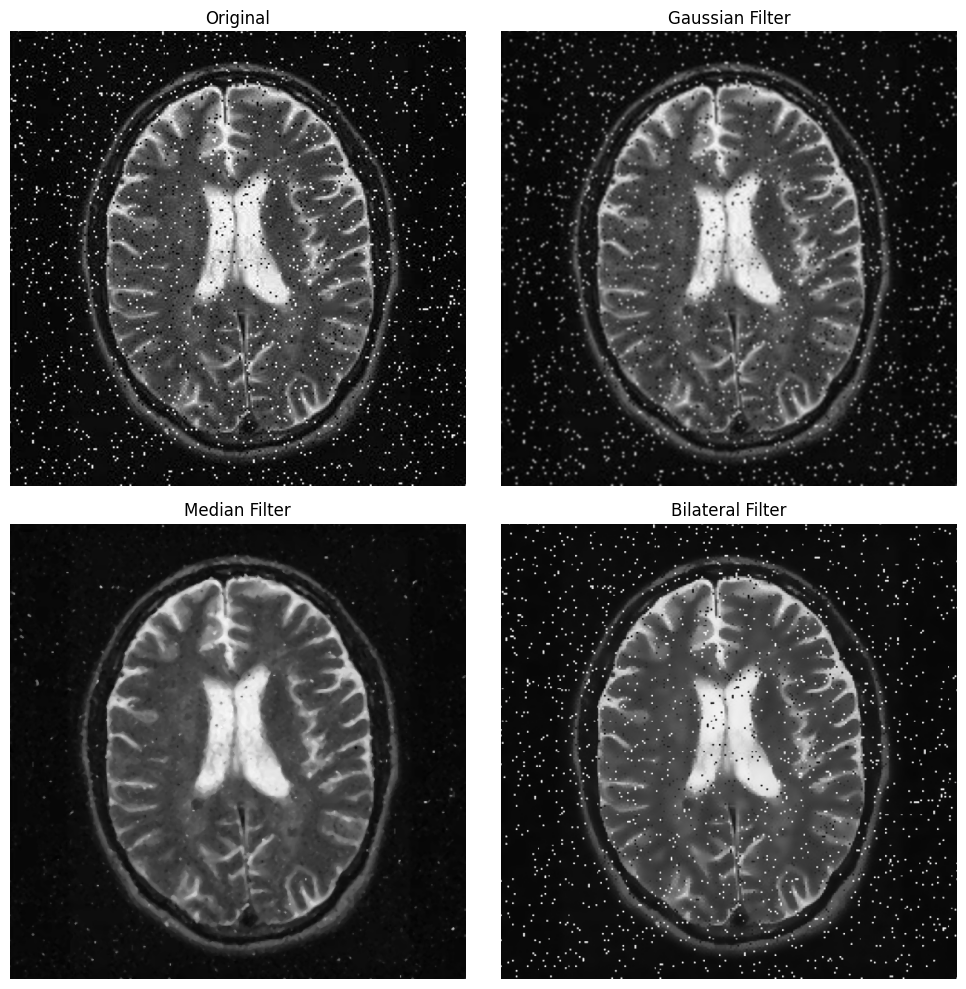

In [14]:
brain_img = image_loader.load_image("../data/brain.png")

gaussian_brain_img= gaussian_filter(brain_img, kernel_size=7)
median_brain_img = median_filter(brain_img, kernel_size=5)
bilateral_brain_img = bilateral_filter(brain_img, diameter=15, sigma_color=75, sigma_space=75)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(brain_img)
plt.title("Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(gaussian_brain_img)
plt.title("Gaussian Filter")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(median_brain_img)
plt.title("Median Filter")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(bilateral_brain_img)
plt.title("Bilateral Filter")
plt.axis("off")

plt.tight_layout()
plt.show()

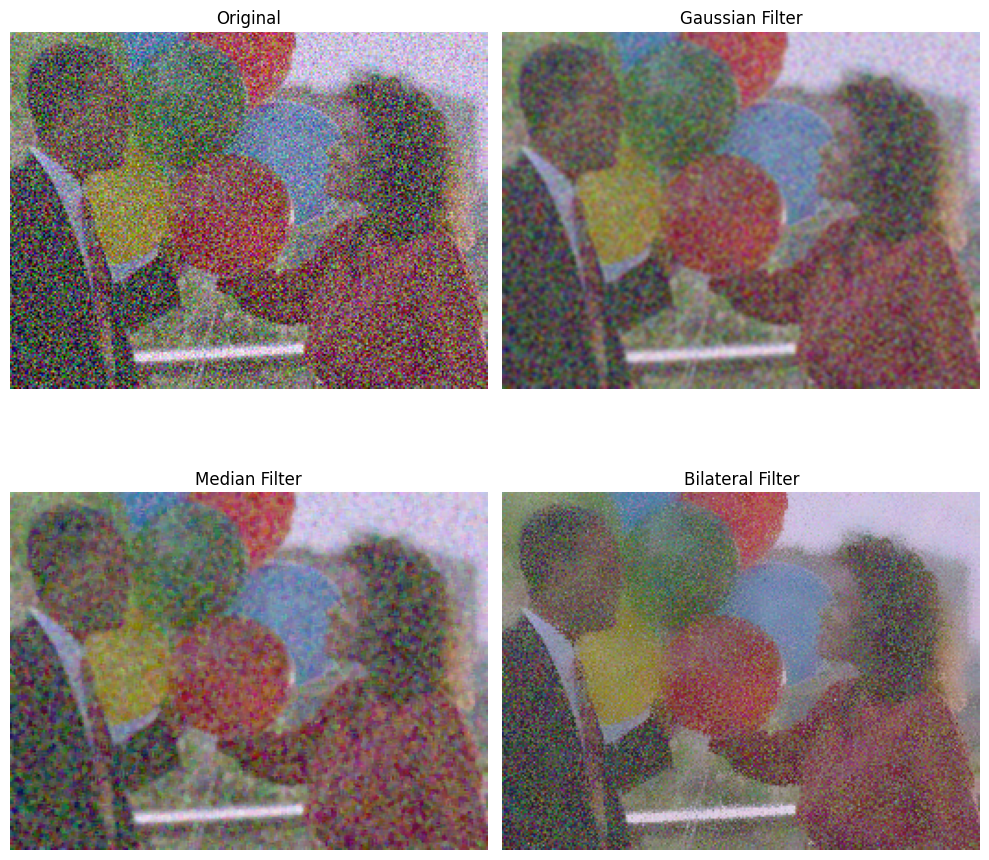

In [15]:
happy_img = image_loader.load_image("../data/holiday.jpeg")

gaussian_happy_img = gaussian_filter(happy_img , kernel_size=3)
median_happy_img  = median_filter(happy_img , kernel_size=3)
bilateral_happy_img  = bilateral_filter(happy_img , diameter=15, sigma_color=75, sigma_space=75)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(happy_img)
plt.title("Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(gaussian_happy_img)
plt.title("Gaussian Filter")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(median_happy_img)
plt.title("Median Filter")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(bilateral_happy_img)
plt.title("Bilateral Filter")
plt.axis("off")

plt.tight_layout()
plt.show()

## Sharpening

In [18]:
from image_sharpening import laplacian_sharpening, unsharp_masking

In [19]:
one_img = image_loader.load_image("../data/png_image.png")

In [23]:
laplacian_sharpened = laplacian_sharpening(one_img)
unsharp_masked = unsharp_masking(one_img, sigma=2.5, strength=1.5)

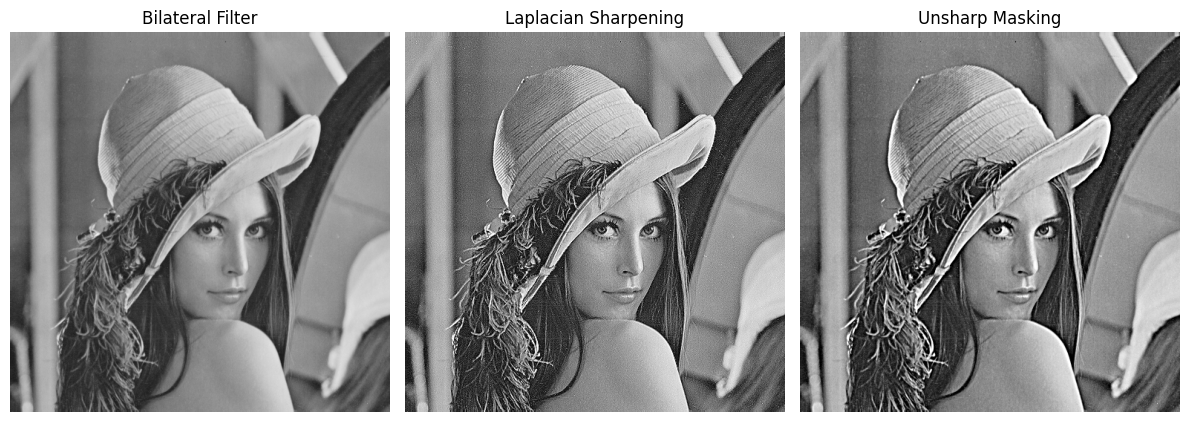

In [24]:
plt.figure(figsize=(12,8))

plt.subplot(1, 3, 1)
plt.imshow(one_img)
plt.title("Bilateral Filter")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(laplacian_sharpened)
plt.title("Laplacian Sharpening")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(unsharp_masked)
plt.title("Unsharp Masking")
plt.axis("off")

plt.tight_layout()
plt.show()